In [1]:
import pandas as pd
import pickle

import shap
from lime import lime_tabular

import matplotlib.pyplot as plt

In [2]:
X = pd.read_pickle('dataframes/X_filled_random_undersampled.pkl')
y = pd.read_pickle('dataframes/y_filled_random_undersampled.pkl')

with open('models/LGBM_model.pkl', 'rb') as f:
    LGBM_model = pickle.load(f)

#explainer = lime_tabular.LimeTabularExplainer(X_train, mode="regression", feature_names= boston.feature_names)

explainer = shap.KernelExplainer(LGBM_model.predict, shap.sample(X, 3000))
shap_values = explainer.shap_values(X.iloc[0])

Trying to unpickle estimator LabelEncoder from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Using 3000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each 

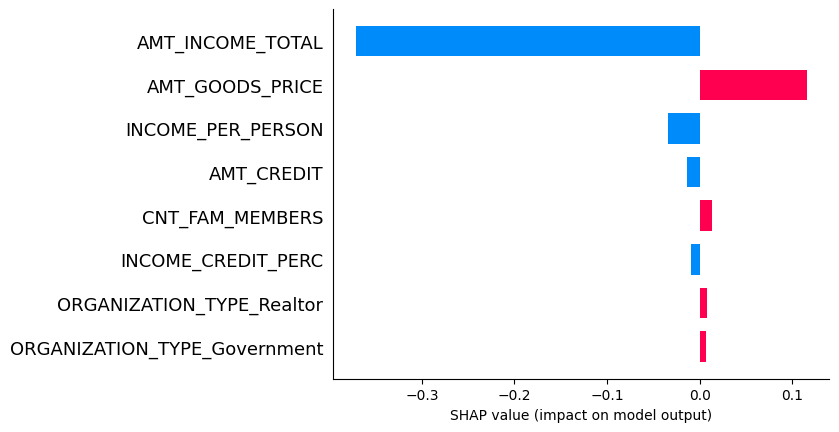

<Figure size 640x480 with 0 Axes>

In [3]:
shap.bar_plot(shap_values,
              feature_names=X.columns,
              max_display=8)
plt.savefig('shap_local_explainer.png')

In [ ]:
with open('explainer.pkl', 'wb') as f:
    pickle.dump(explainer, f)

In [5]:
val_list = list(LGBM_model.feature_importances_)

In [6]:
columns = LGBM_model.feature_name_

In [7]:
df = pd.DataFrame([val_list], columns=columns)

In [8]:
for col in df.columns:
    if df[col].mean() < 1:
        del df[col]

In [9]:
unsorted_list = list()
for col in df.columns:
    unsorted_list.append((df[col].iloc[0], col))

In [10]:
sorted_list = sorted(unsorted_list, reverse=True)
values = [item[0] for item in sorted_list]
cols = [item[1] for item in sorted_list]

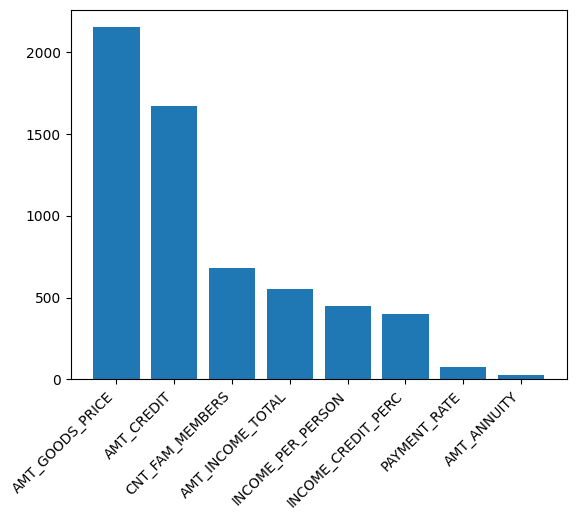

In [11]:
plt.bar(cols, values)
plt.xticks(rotation=45, ha="right");
plt.savefig('feature_importance_global_explainer.png')

In [ ]:
savefig